In [1]:
%matplotlib inline

In [2]:
from glob import glob
from scipy import constants

In [3]:
npy_files = glob('*num_0_1_2_atten_41.npy')
df = pd.concat([pd.DataFrame.from_records(np.load(npy_file)) for npy_file in npy_files], ignore_index=True)
df.shape

(51, 74)

# Data cuts

In [4]:
def plot_s21(ax, row,
             data_linestyle='none', data_marker='.', data_color='blue',
             model_linestyle='-', model_marker='', model_color='brown',
             f0_marker='o', f0_color='brown'):
    
    ax.plot(row.res_s21_data.real,
            row.res_s21_data.imag,
            linestyle=data_linestyle, marker=data_marker, color=data_color)
    ax.plot(row.res_model_s21.real,
            row.res_model_s21.imag,
            linestyle=model_linestyle, marker=model_marker, color=model_color)
    ax.plot(row.res_model_s21_at_f_0.real,
            row.res_model_s21_at_f_0.imag,
            linestyle='none', marker=f0_marker, color=f0_color)

    
def plot_S_masked_binned(ax, row, Sxx_color='blue', Syy_color='brown'):
    ax.plot(row.S_frequency_masked_binned,
            row.S_yy_masked_binned,
            color=Syy_color)
    ax.plot(row.S_frequency_masked_binned,
            row.S_xx_masked_binned,
            color=Sxx_color)

    
def plot_sweeps(dfn):
    fig, axes = plt.subplots(6, 3, figsize=(6, 12))
    for (n, row), ax in zip(dfn.iterrows(), axes.flatten()):
        if row.shield:
            title = 'shield'
        elif row.ambient:
            title = 'ambient'
        else:
            title = 'array'
            if row.magnet_array_orientation == 1:
                title += ' up'
            else:
                title += ' down'
            title += ' {:.0f}'.format(row.magnet_array_height_mm)
        if not row.sweep_good:
            title += " CUT"
        plot_s21(ax, row)
        ax.set_title(title, fontsize='xx-small')
        ax.set_xticks([])
        ax.set_yticks([])
        x_min, x_max = ax.get_xlim()
        x_expand = 0.0 * (x_max - x_min)
        ax.set_xlim(x_min - x_expand, x_max + x_expand)
        y_min, y_max = ax.get_ylim()
        y_expand = 0.1 * (y_max - y_min)
        ax.set_ylim(y_min - y_expand, y_max + y_expand)
    for ax in axes.flatten()[dfn.shape[0]:]:
        ax.set_xticks([])
        ax.set_yticks([]) 
    return fig, axes

    
def plot_noise(dfn, y_min, y_max):
    fig, axes = plt.subplots(6, 3, figsize=(6, 12))
    for (n, row), (ax_index, ax) in zip(dfn.iterrows(), enumerate(axes.flatten())):
        if row.shield:
            title = 'shield'
        elif row.ambient:
            title = 'ambient'
        else:
            title = 'array'
            if row.magnet_array_orientation == 1:
                title += ' up'
            else:
                title += ' down'
            title += ' {:.0f}'.format(row.magnet_array_height_mm)
        if not row.noise_good:
            title += " CUT"
        plot_S_masked_binned(ax, row)
        ax.set_title(title, fontsize='xx-small')
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_ylim(y_min, y_max)
        if not ax_index==15:  # The lower left plot
            ax.set_xticks([])
            ax.set_yticks([])
    for ax in axes.flatten()[dfn.shape[0]:]:
        ax.set_xticks([])
        ax.set_yticks([]) 
    return fig, axes


def mark_sweep_bad(df, row_indexer):
    df.loc[row_indexer, 'sweep_good'] = False

    
def mark_noise_bad(df, row_indexer):
    df.loc[row_indexer, 'noise_good'] = False

Mark data as bad here, and see results below.

In [5]:
df['sweep_good'] = True

#mark_sweep_bad(df, (df.number==0) & df.ambient)
#mark_sweep_bad(df, (df.number==0) & (df.magnet_array_height_mm==162) & (df.magnet_array_orientation==1))
#mark_sweep_bad(df, (df.number==0) & (df.magnet_array_height_mm==155) & (df.magnet_array_orientation==1))  # Two sets
#mark_sweep_bad(df, (df.number==0) & (df.magnet_array_height_mm==0) & (df.magnet_array_orientation==-1))

#mark_sweep_bad(df, (df.number==1) & df.ambient)
#mark_sweep_bad(df, (df.number==1) & (df.magnet_array_height_mm==162) & (df.magnet_array_orientation==1))

mark_sweep_bad(df, (df.number==2) & (df.magnet_array_height_mm==85) & (df.magnet_array_orientation==1) & 
               (df.root_path=='/data/readout/2016-07-18_135051_magnet_array.nc'))  # Only one of two
#mark_sweep_bad(df, (df.number==2) & (df.magnet_array_height_mm==0) & (df.magnet_array_orientation==1))

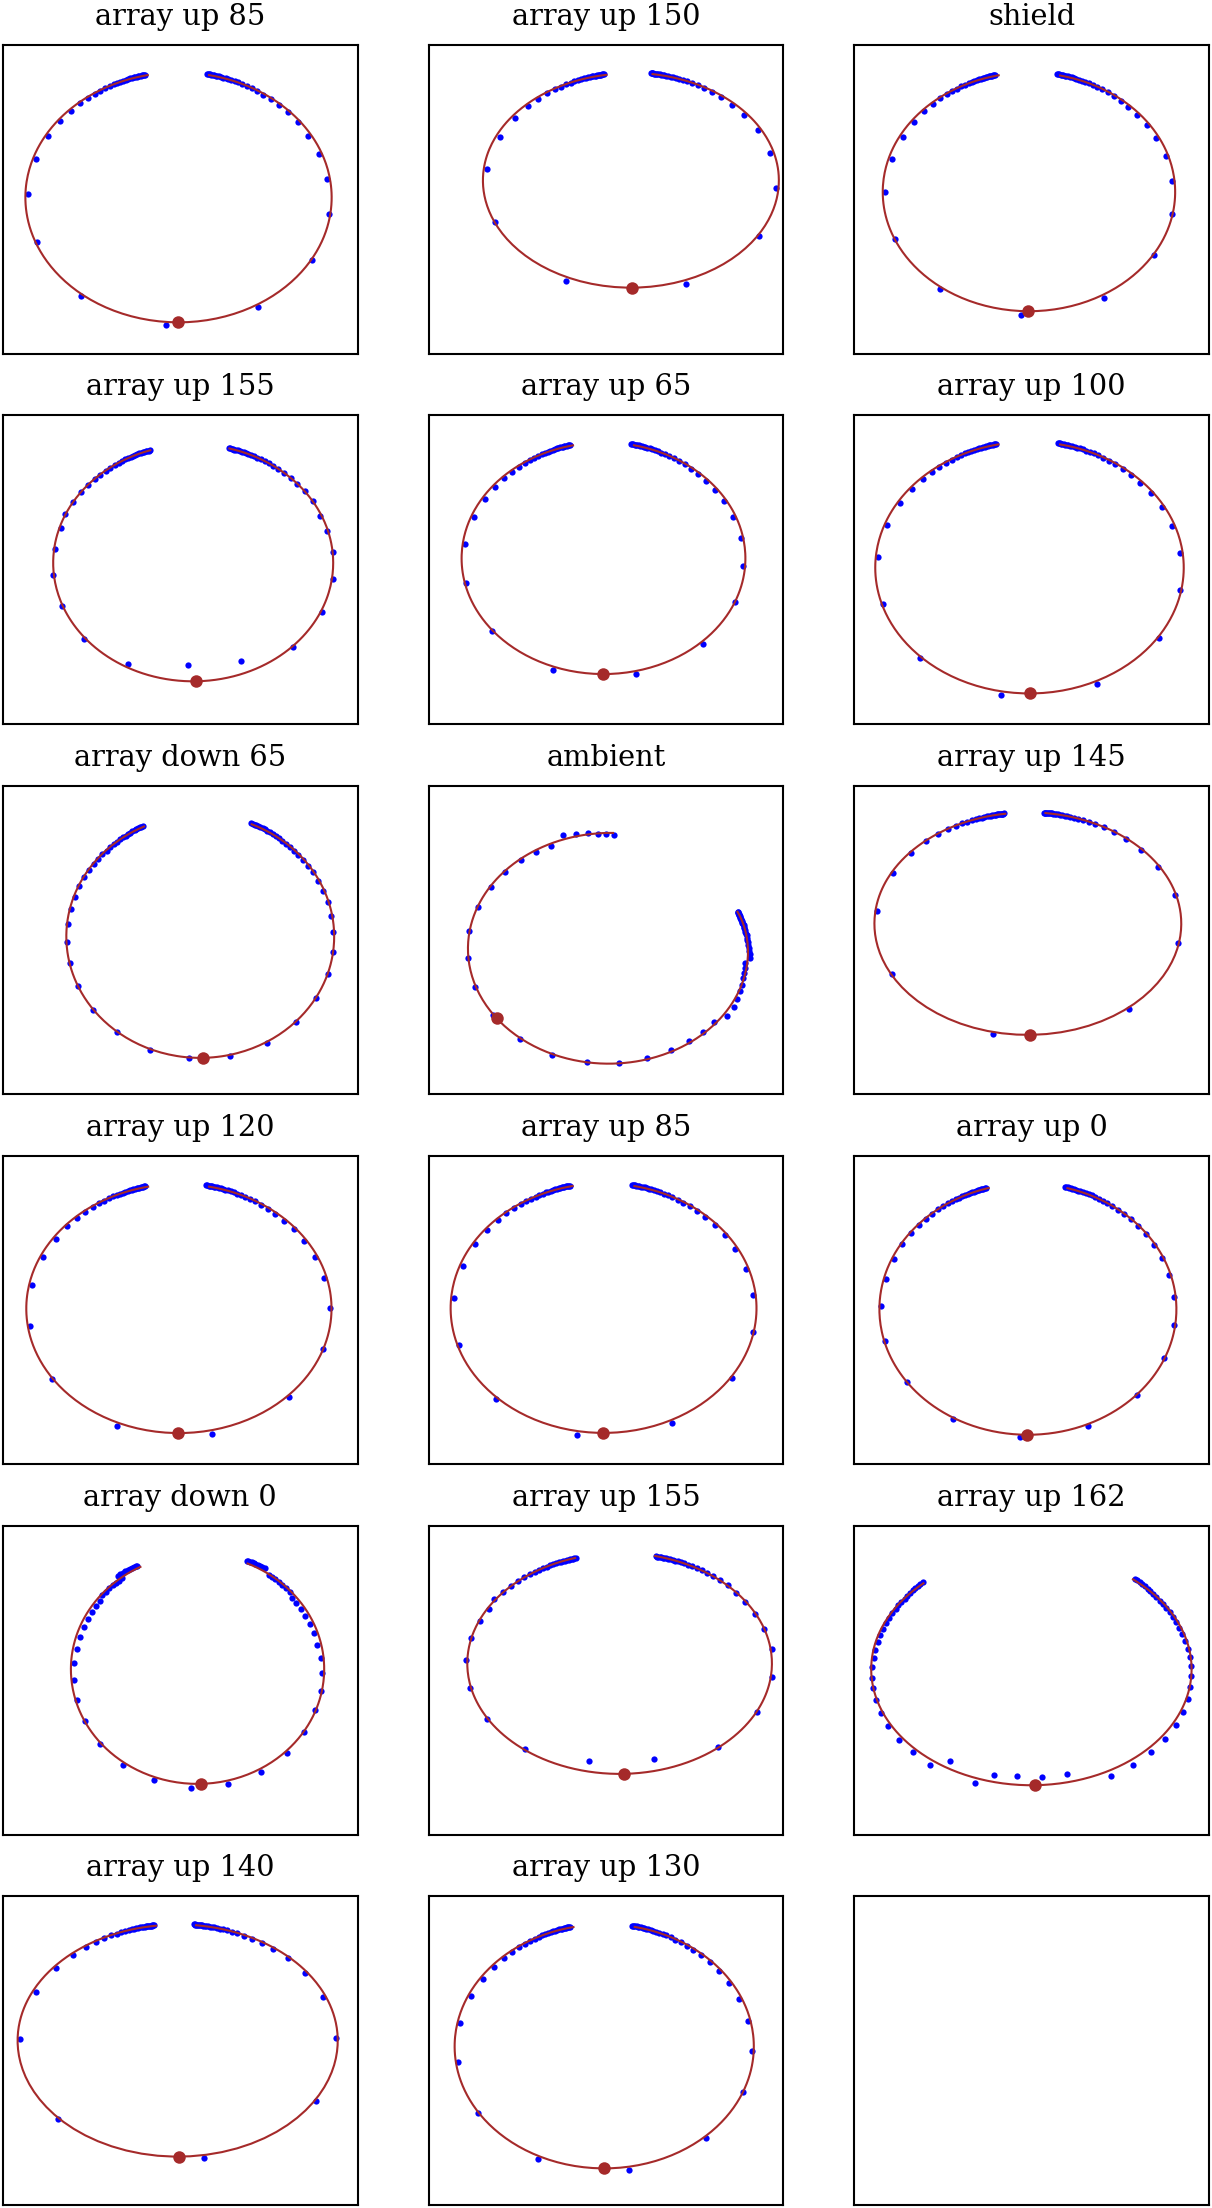

In [6]:
number = 0
fig, axes = plot_sweeps(df[df.number==number])

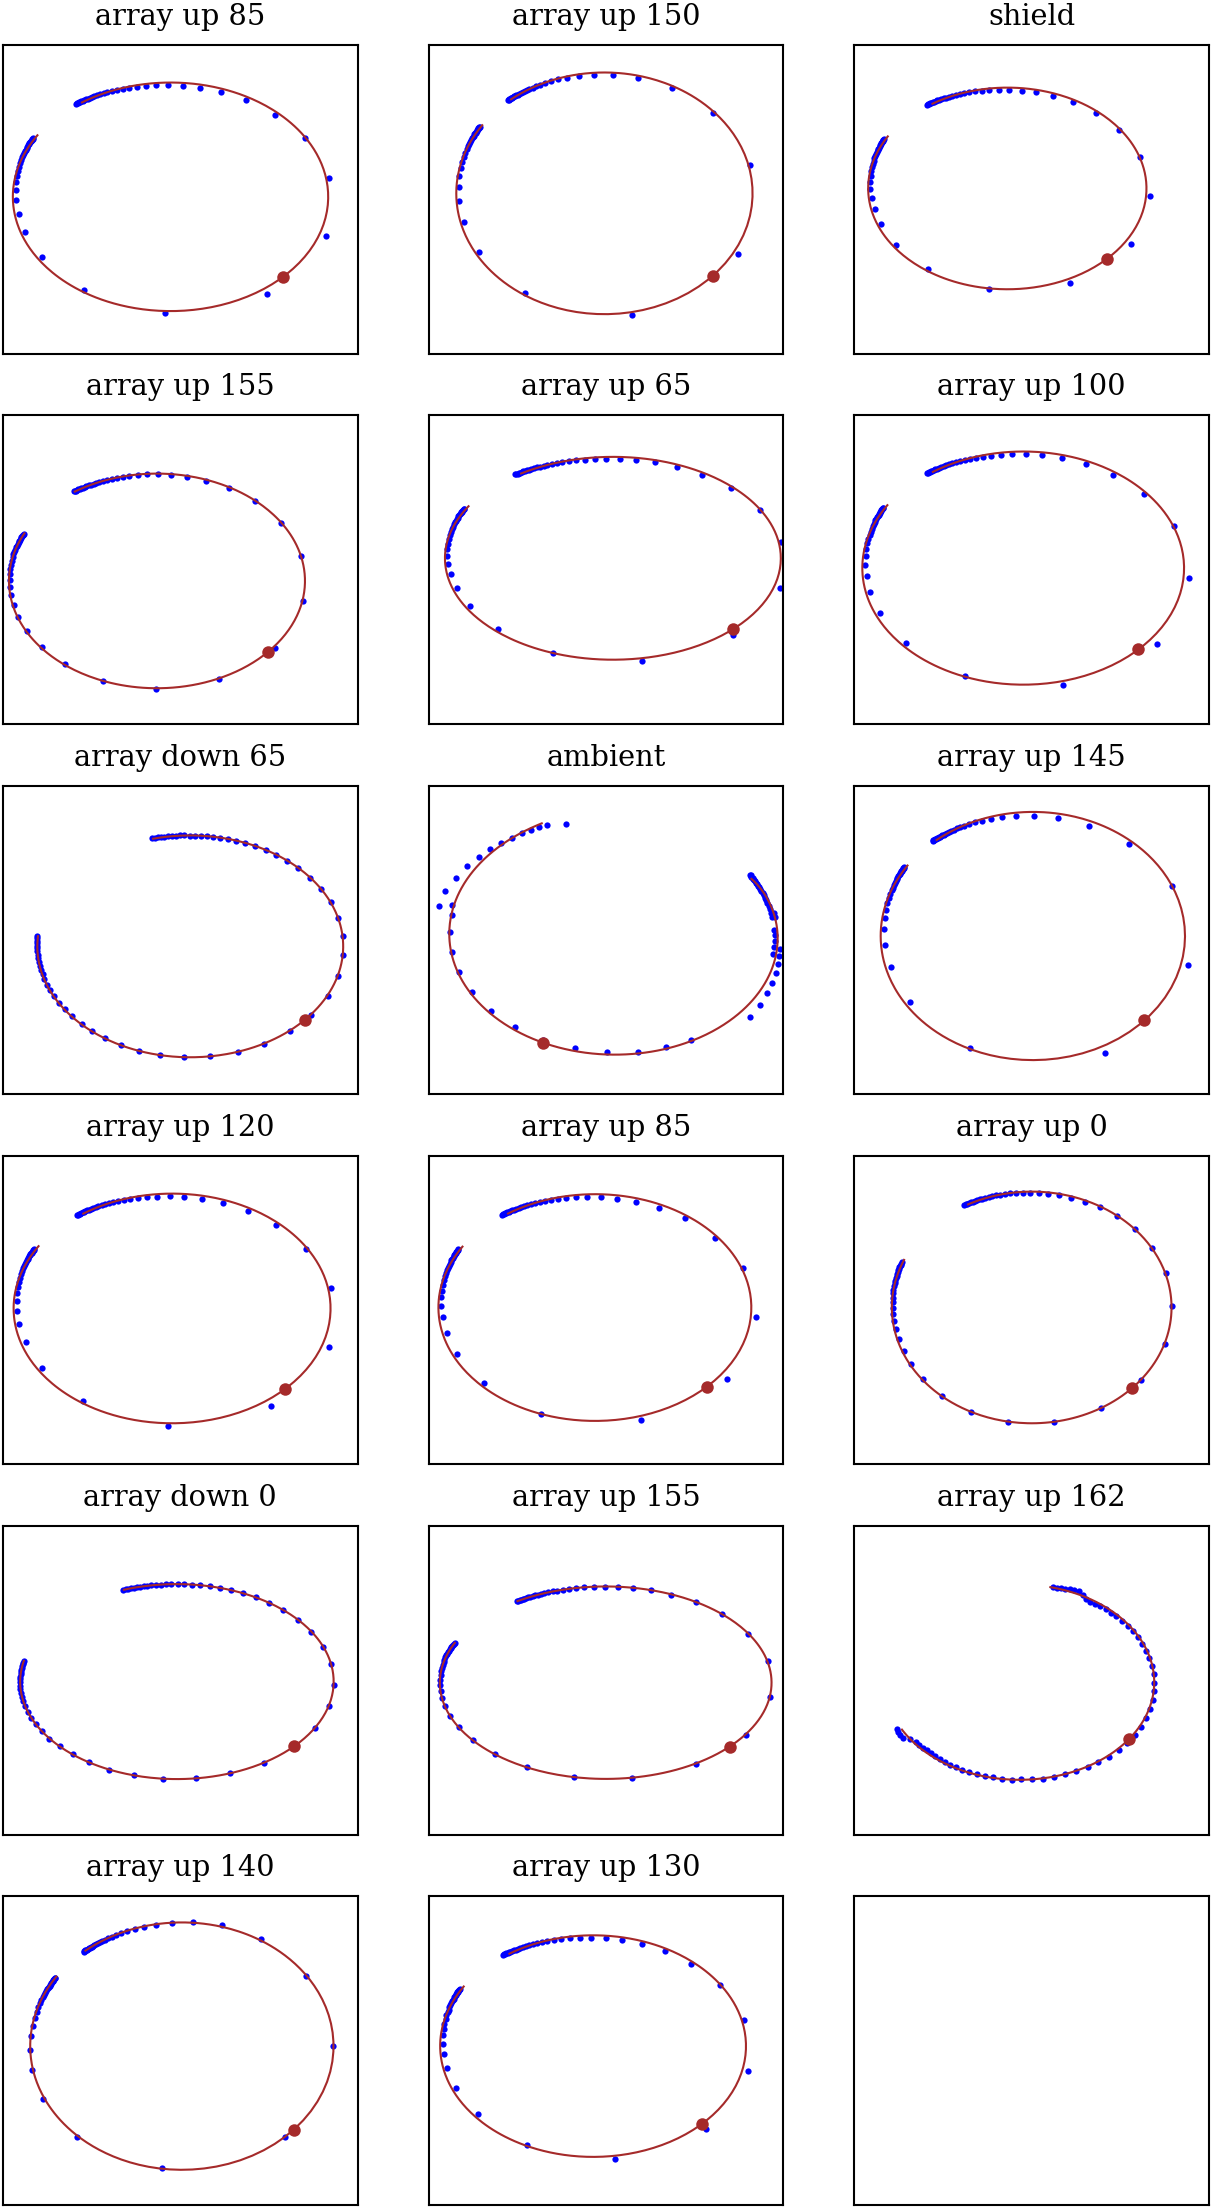

In [7]:
number = 1
fig, axes = plot_sweeps(df[df.number==number])

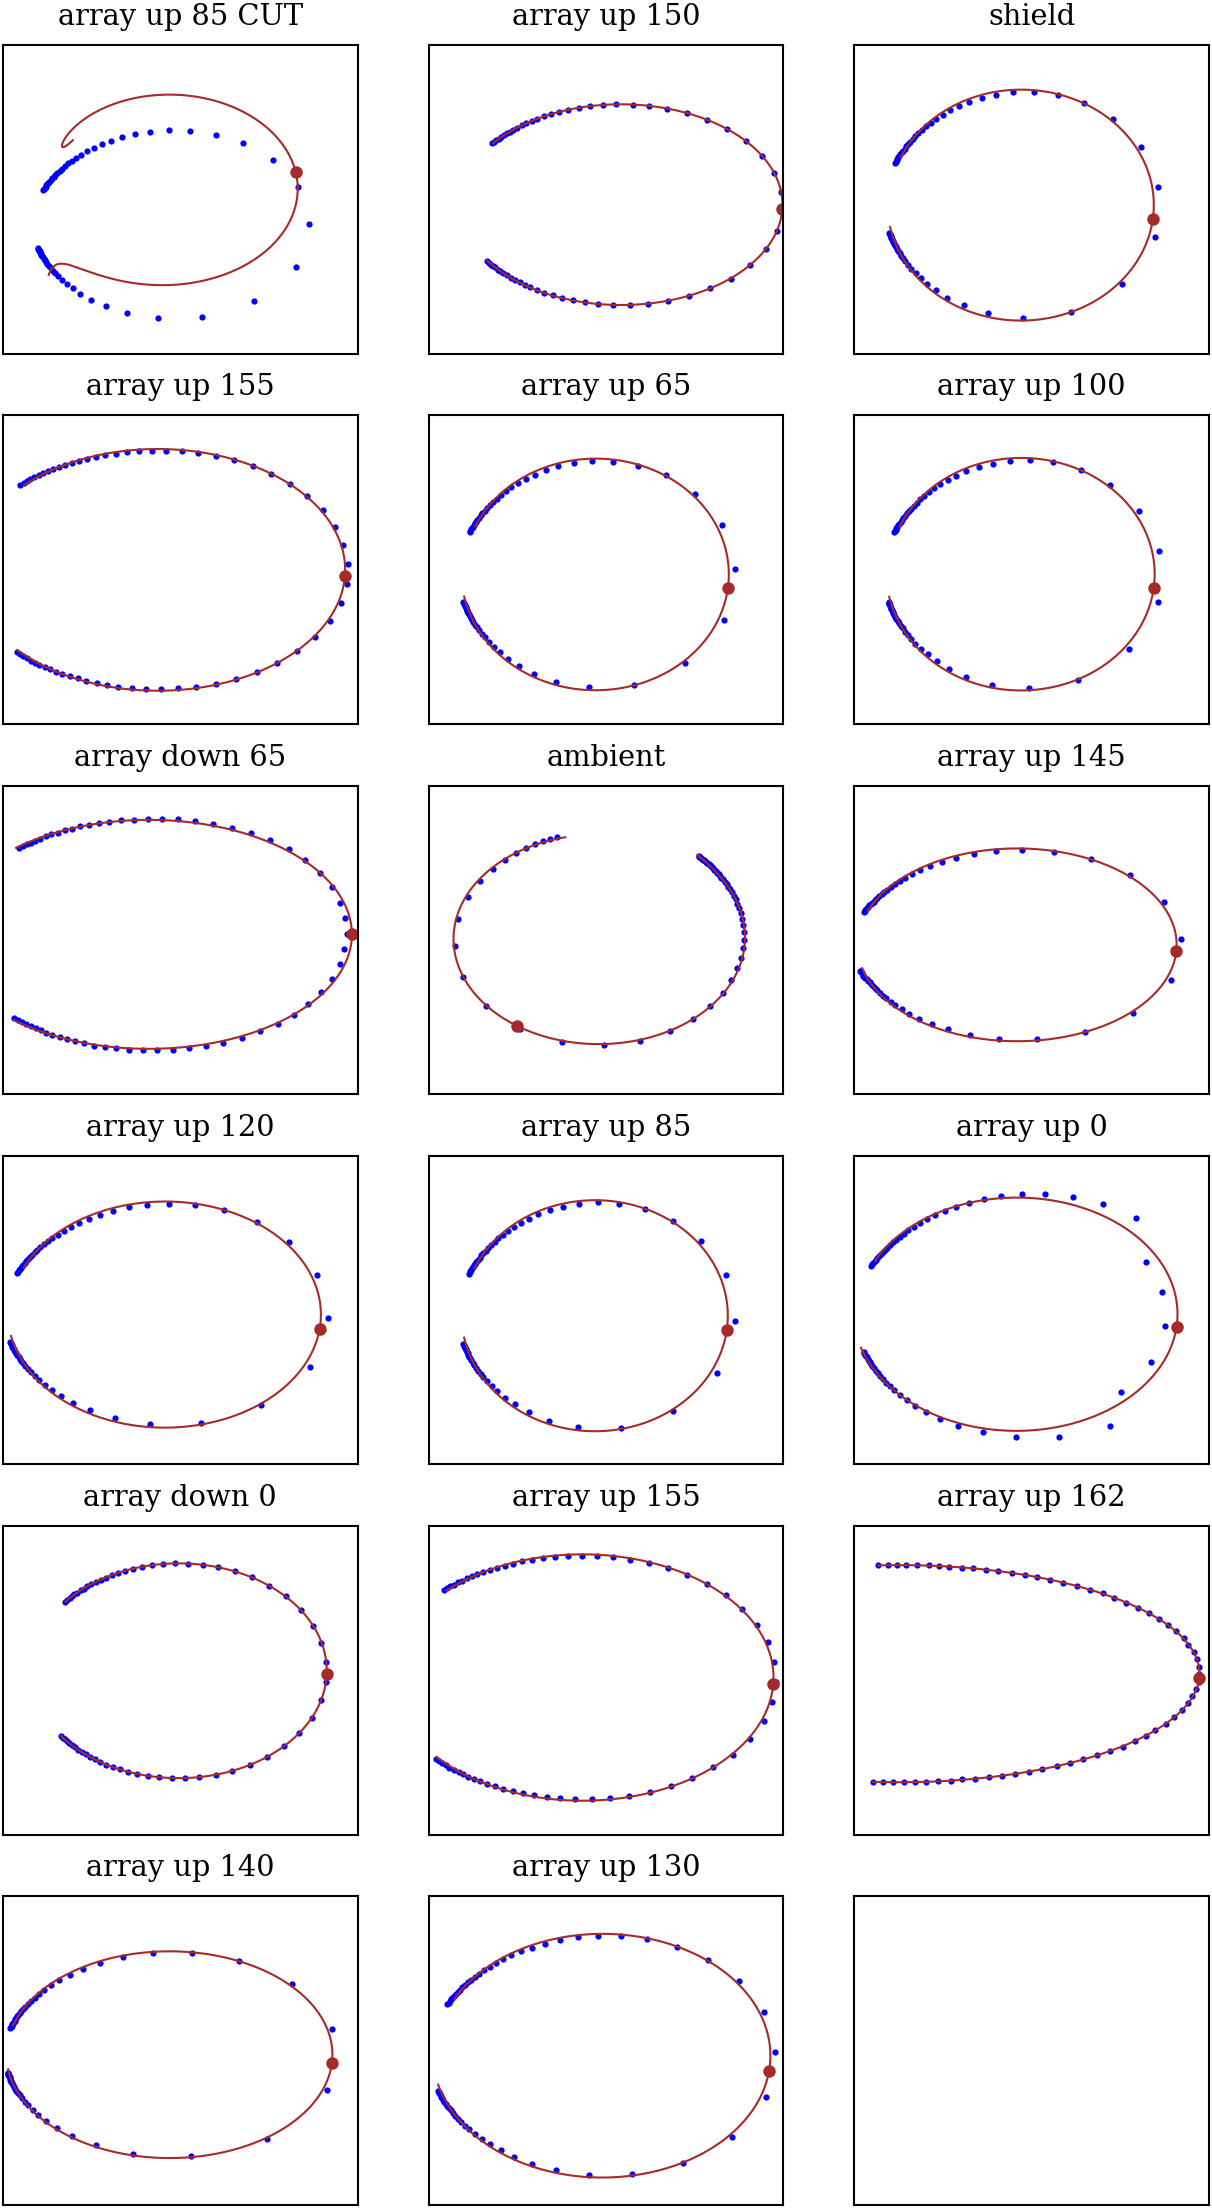

In [8]:
number = 2
fig, axes = plot_sweeps(df[df.number==number])

In [9]:
df['noise_good'] = True

mark_noise_bad(df, (df.number==0) & (df.magnet_array_height_mm==155) & (df.magnet_array_orientation==1))  # Two sets
mark_noise_bad(df, (df.number==0) & (df.magnet_array_height_mm==162) & (df.magnet_array_orientation==1))

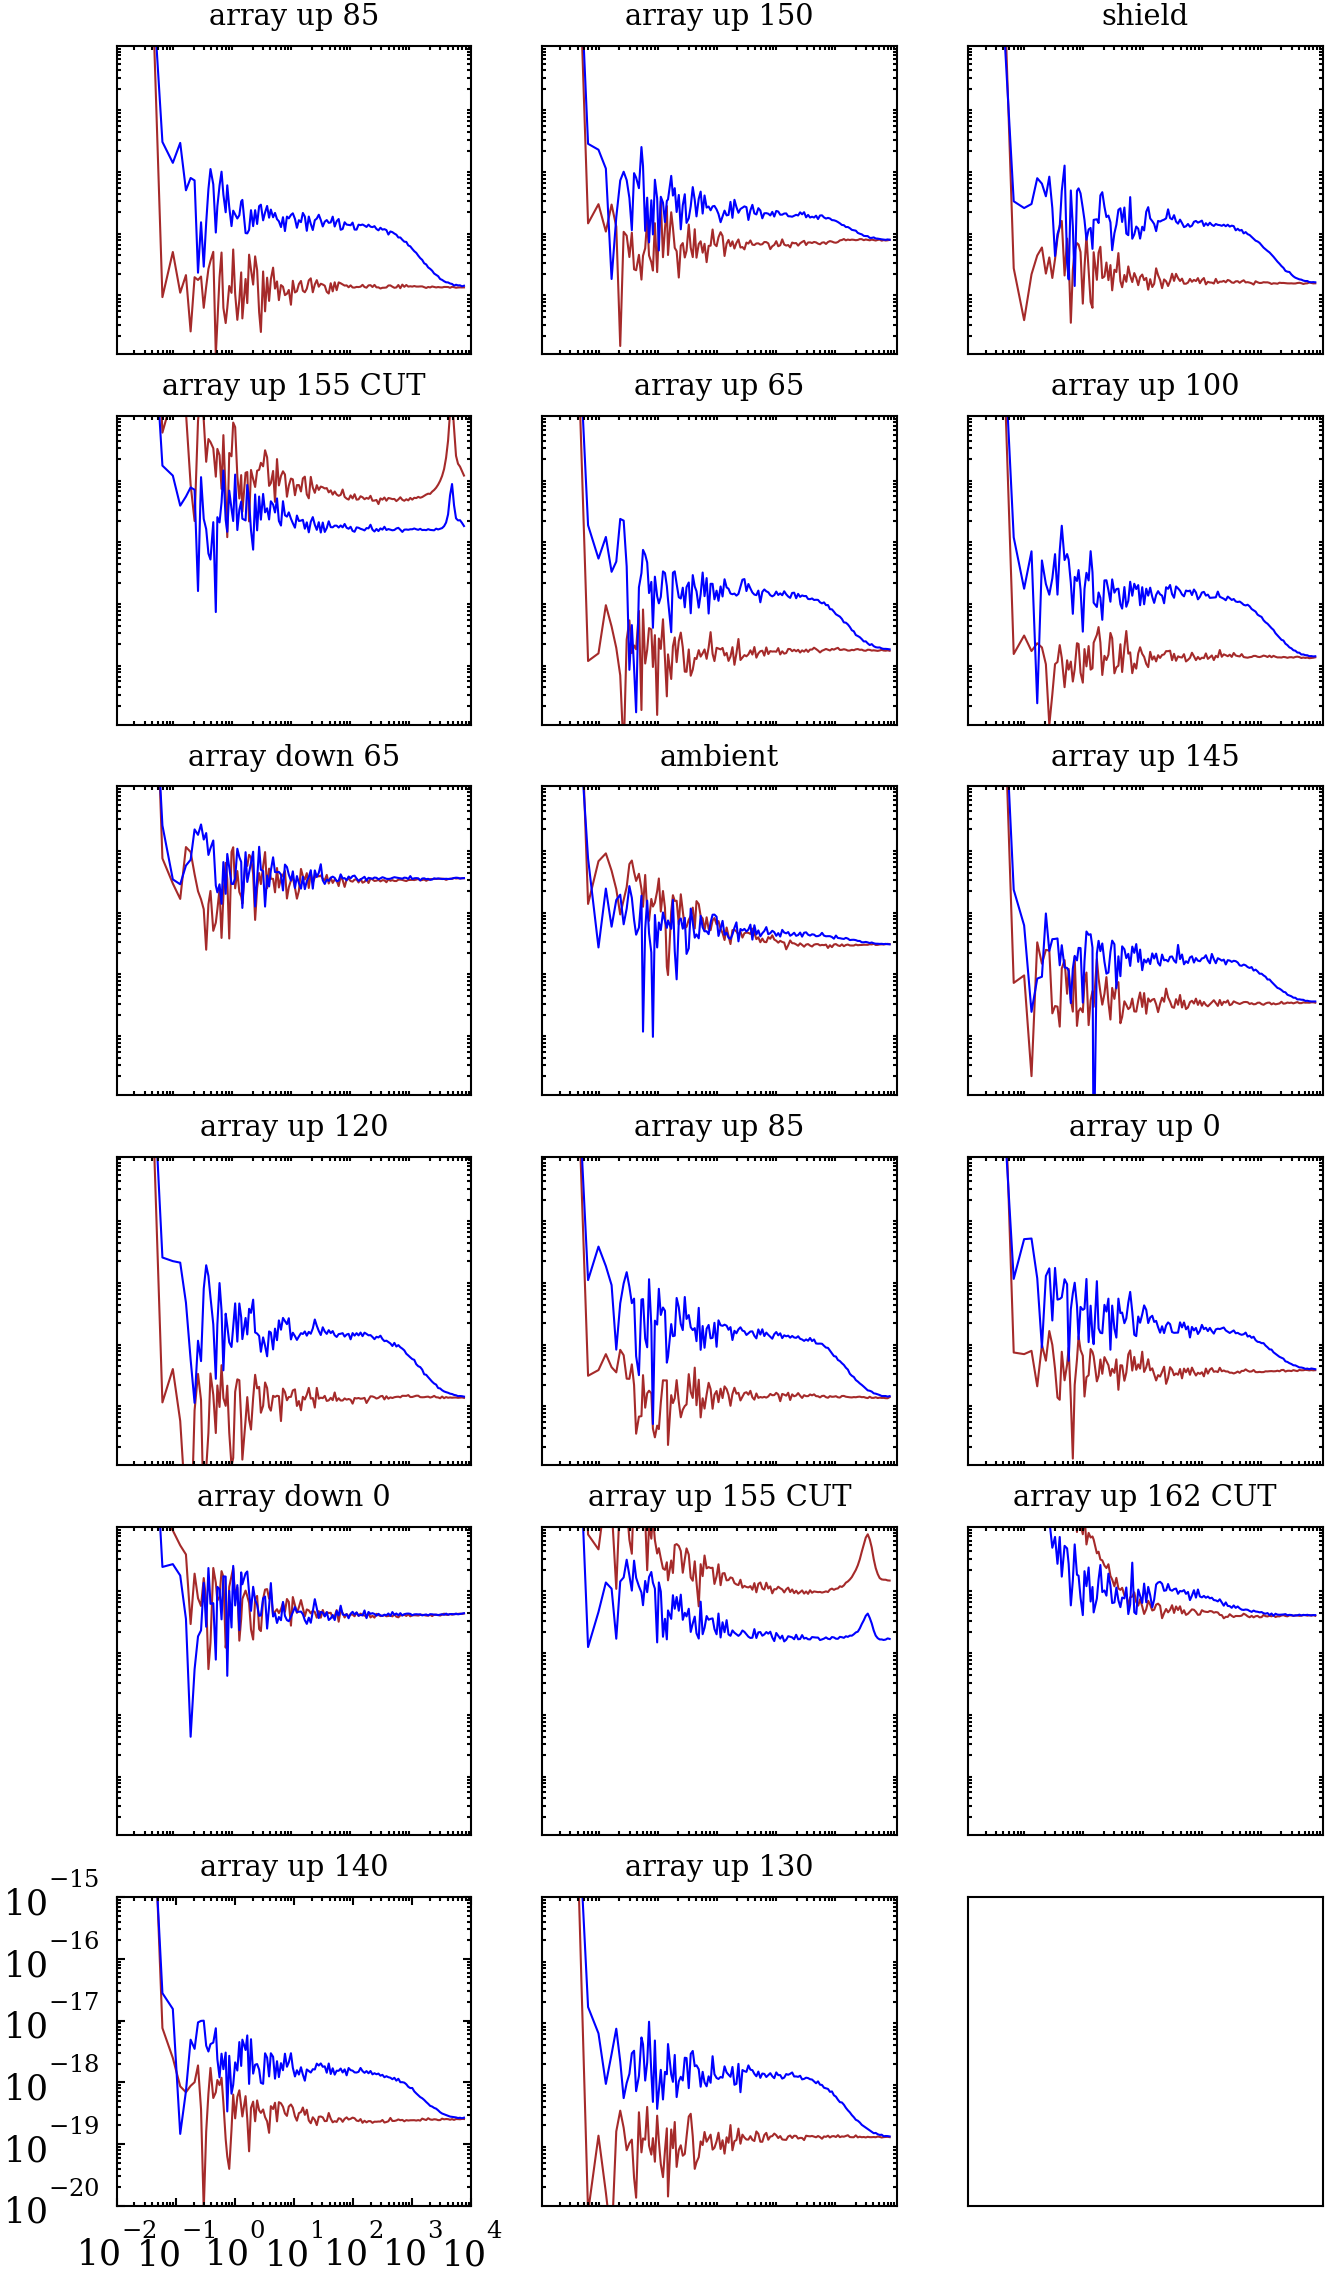

In [10]:
number = 0
fig, axes = plot_noise(df[df.number==number], y_min=1e-20, y_max=1e-15)

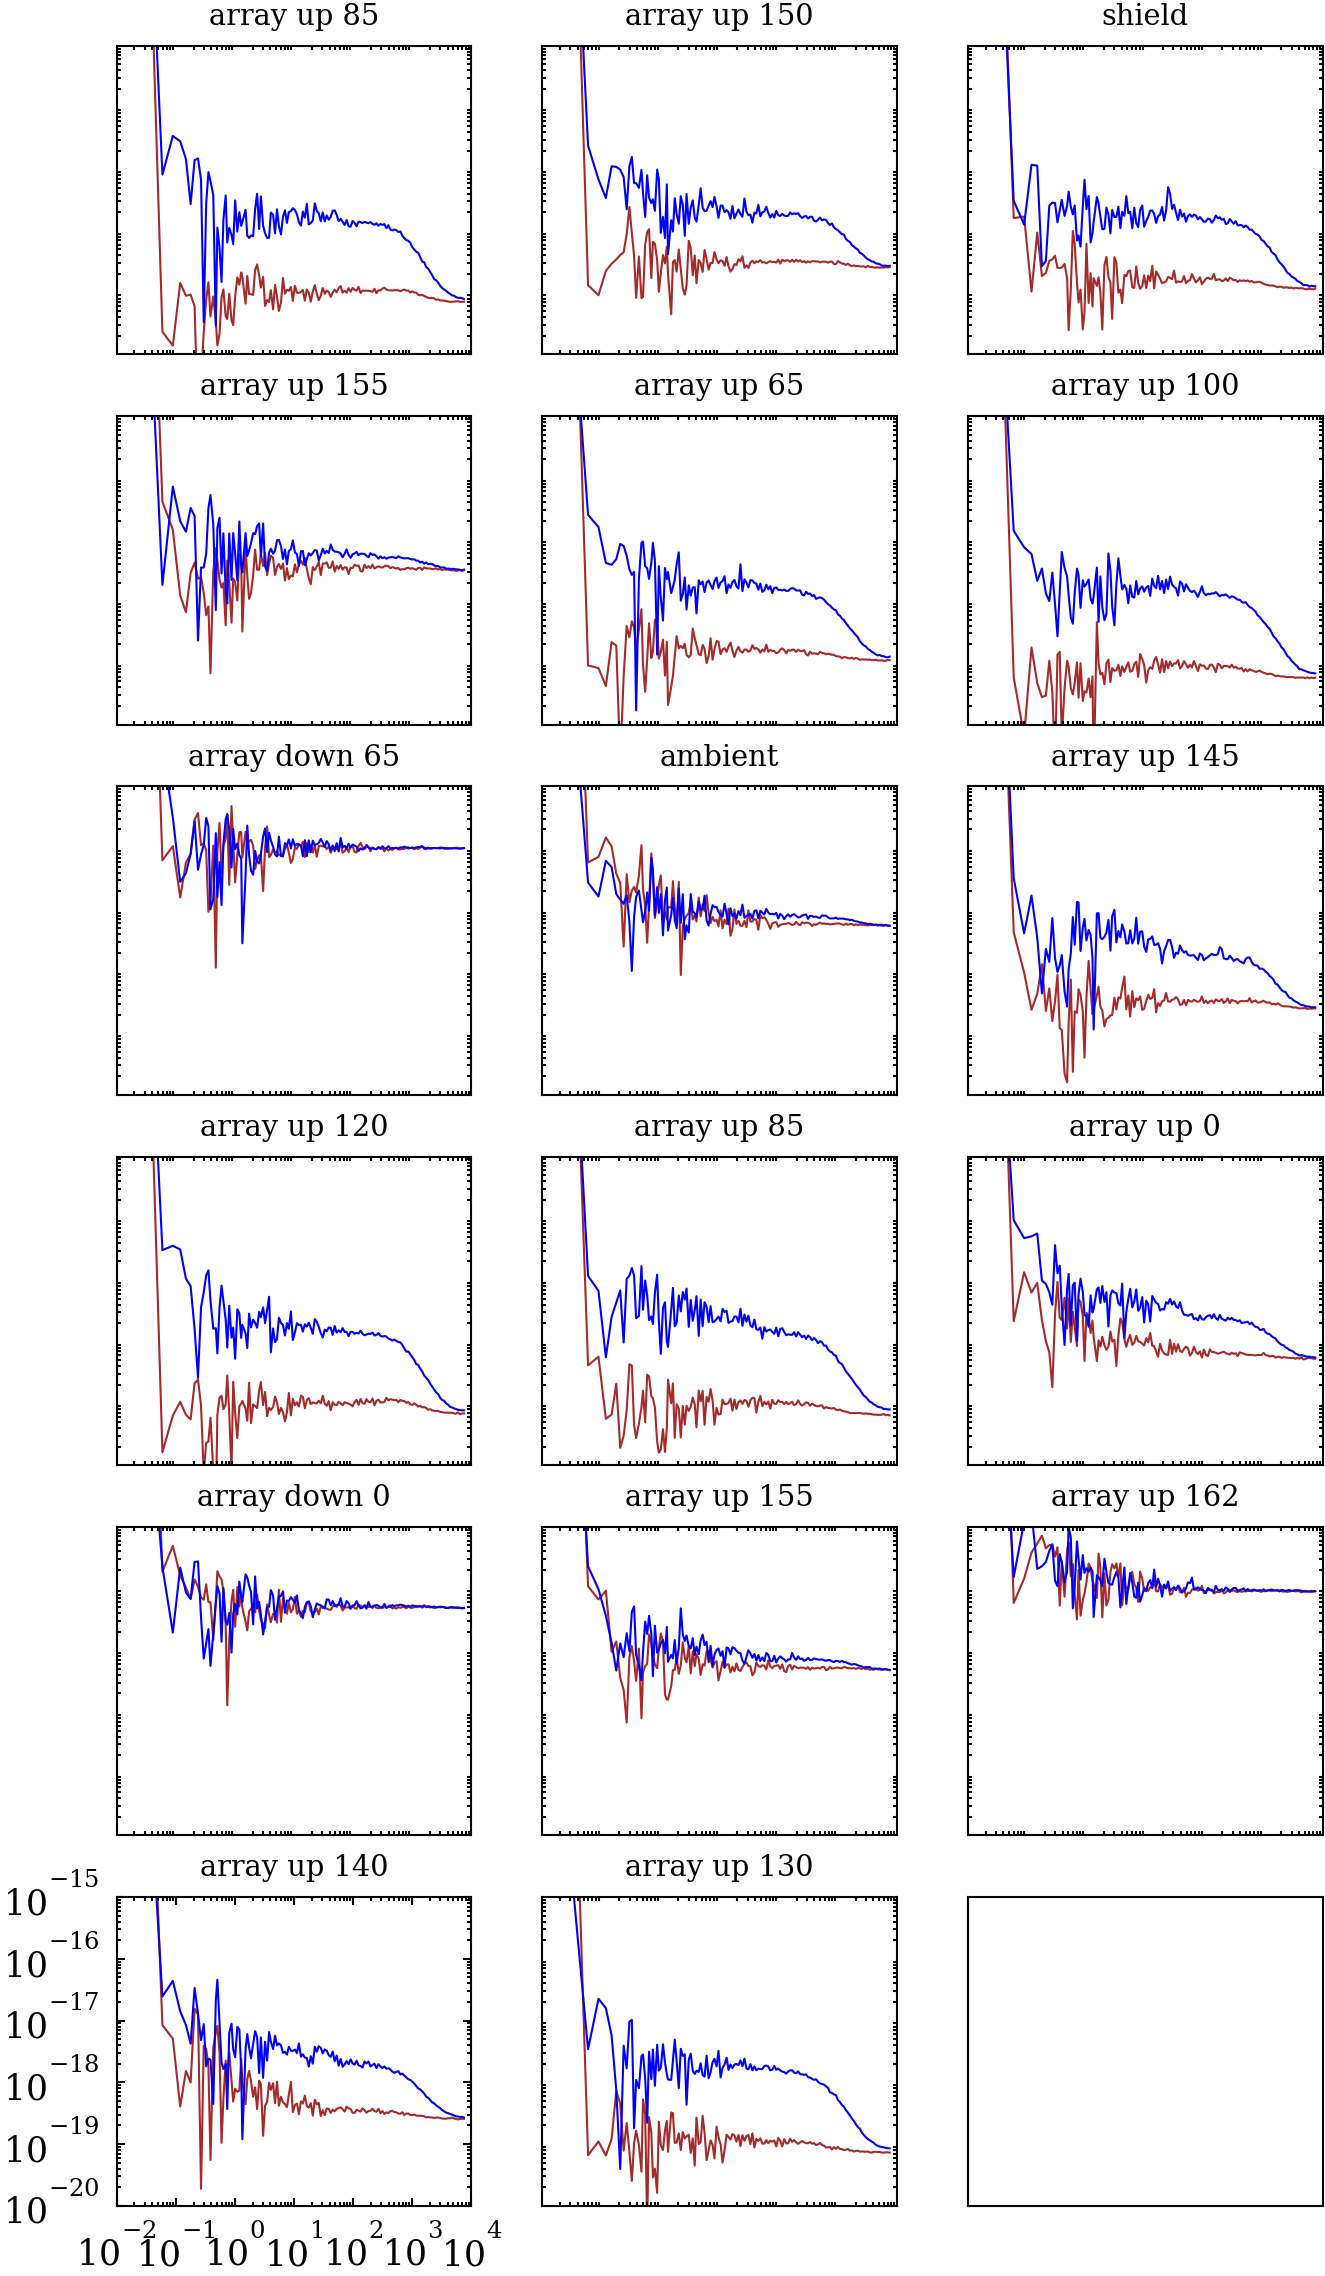

In [11]:
number = 1
fig, axes = plot_noise(df[df.number==number], y_min=1e-20, y_max=1e-15)

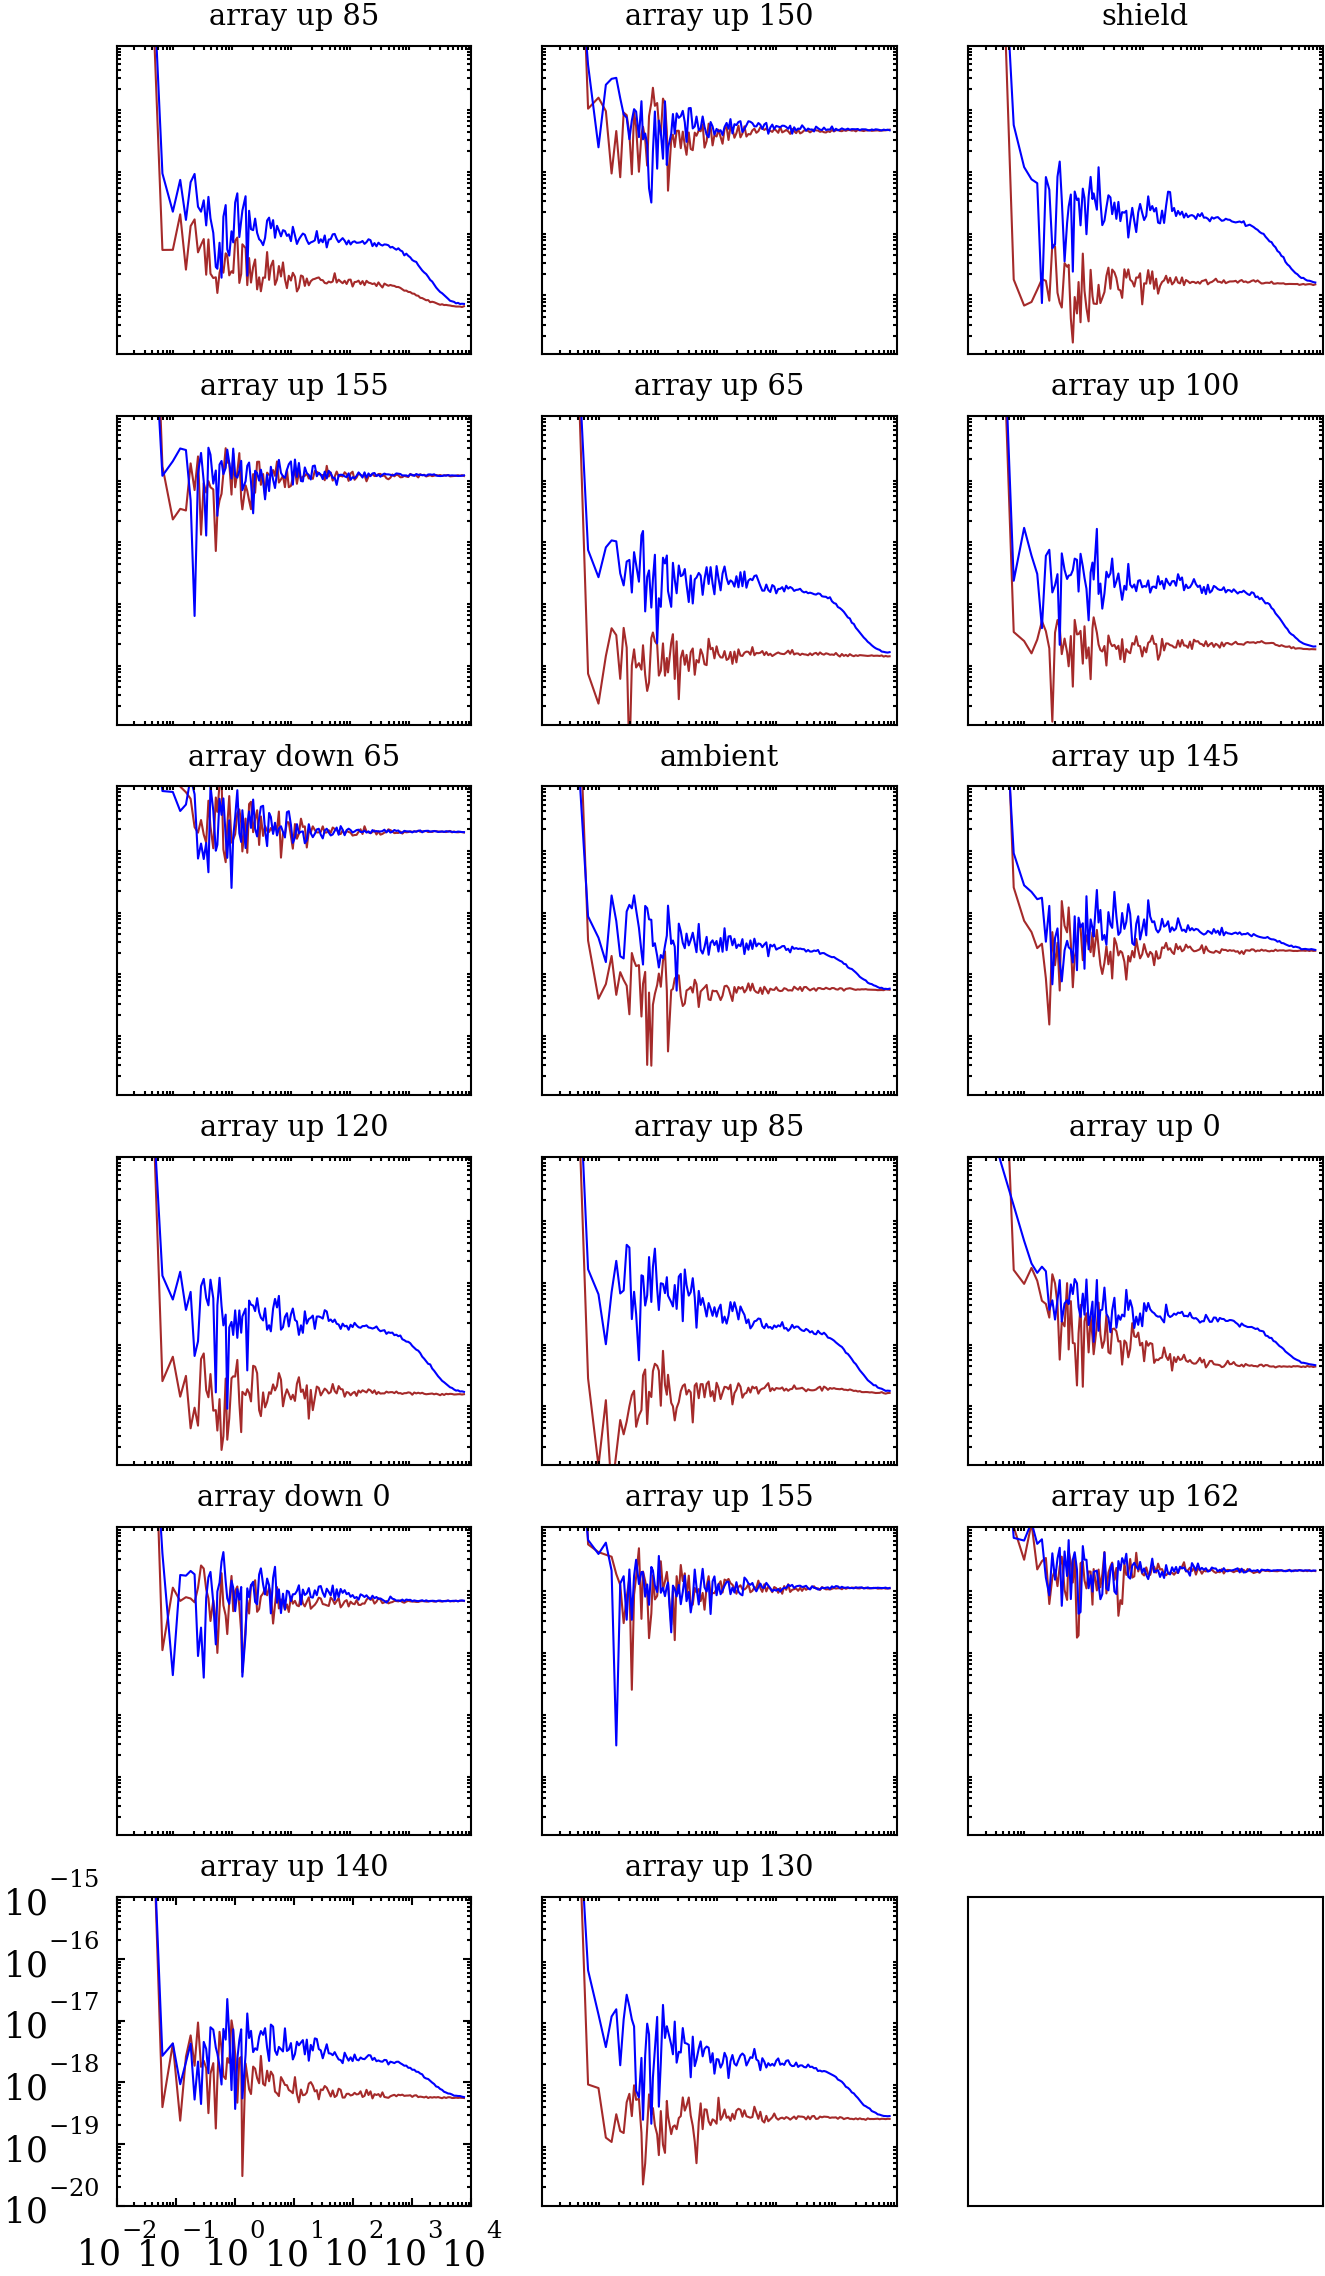

In [12]:
number = 2
fig, axes = plot_noise(df[df.number==number], y_min=1e-20, y_max=1e-15)

# Colormaps

In [13]:
Qi_scale = 1e-5
Qi_mappable = plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=Qi_scale * 0,
                                                              vmax=Qi_scale * df.res_Q_i.max()),
                                    cmap=plt.cm.coolwarm)
Qi_mappable.set_array(np.array(df.res_Q_i))

B_mappable = plt.cm.ScalarMappable(norm=mpl.colors.Normalize(vmin=df.field_uT.min(),
                                                             vmax=df.field_uT.max()),
                                   cmap=plt.cm.coolwarm)
B_mappable.set_array(np.unique(df.field_uT))

# Temperature

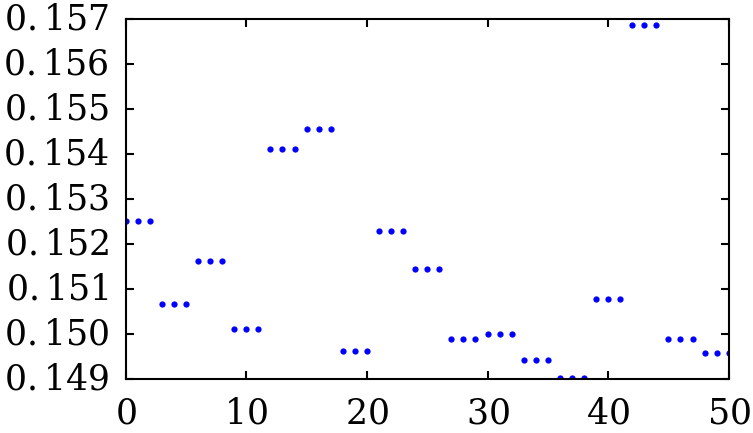

In [14]:
fig, ax = plt.subplots()
ax.plot(df.temperature_package, '.')

In [15]:
df[df.temperature_package == df.temperature_package.max()].magnet_array_height_mm

42    162
43    162
44    162
Name: magnet_array_height_mm, dtype: object

# Flux density

In [16]:
Phi_0 = constants.physical_constants['mag. flux quantum'][0]
w = 12e-6
B_th = Phi_0 * w**-2
print("B_th is approximately {:.1f} uT".format(1e6 * B_th))

B_th is approximately 14.4 uT


# $|s_{21}|$ vs. frequency with $B$ colorbar

In [17]:
def plot_resonances(dataframe, axis, f_scale=1e-6, normalize=False,
                    plot_data=True, plot_model=True, plot_resonance=True,
                    data_marker='o', data_markersize=1, resonance_marker='s', resonance_markersize=2,
                    **plot_kwds):
    for n, row in dataframe.iterrows():
        if plot_data:
            if normalize:
                ax.plot(f_scale * row.res_frequency_data,
                        20 * np.log10(np.abs(row.res_s21_data_normalized)),
                        color=B_mappable.to_rgba(row.field_uT),
                        linestyle='none', marker=data_marker, markersize=data_markersize, **plot_kwds)
            else:
                ax.plot(f_scale * row.res_frequency_data,
                        20 * np.log10(np.abs(row.res_s21_data)),
                        color=B_mappable.to_rgba(row.field_uT),
                        linestyle='none', marker=data_marker, markersize=data_markersize, **plot_kwds)
        if plot_model:
            if normalize:
                ax.plot(f_scale * row.res_model_frequency,
                        20 * np.log10(np.abs(row.res_model_s21_normalized)),
                        color=B_mappable.to_rgba(row.field_uT),
                        linestyle='-', **plot_kwds)
            else:
                ax.plot(f_scale * row.res_model_frequency,
                        20 * np.log10(np.abs(row.res_model_s21)),
                        color=mappable_B.to_rgba(row.field_uT),
                        linestyle='-', **plot_kwds)

        

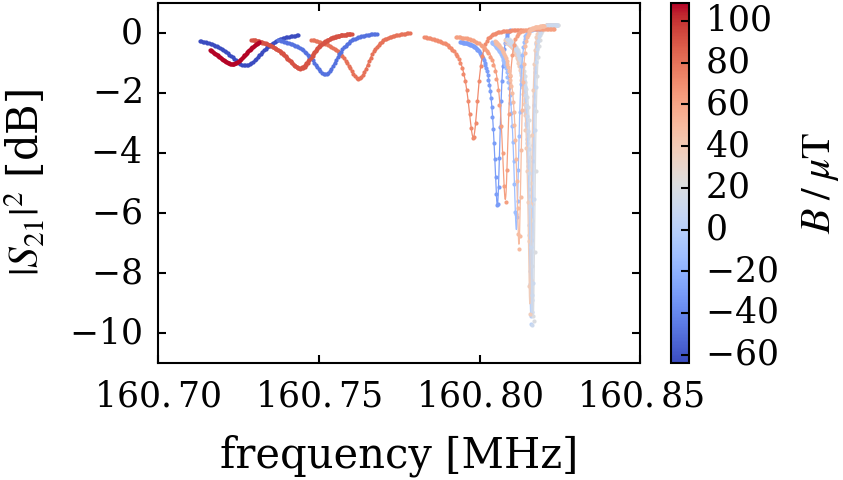

In [29]:
number = 2
attenuation = 41
dfn = df[(df.number == number) & (df.roach_dac_attenuation==attenuation) & df.sweep_good]

fig, ax = plt.subplots()
ax.set_xlabel('frequency [MHz]')
ax.set_ylabel('$|S_{21}|^2$ [dB]')

plot_resonances(dataframe=dfn, axis=ax, normalize=True, plot_data=True, plot_model=True, linewidth=0.3)
fig.colorbar(B_mappable, label='$B \; / \; \mu \mathrm{T}$')
ax.get_xaxis().get_major_formatter().set_useOffset(False)
#ax.set_xlim(160.69, 160.84)
ax.set_xticks([160.7, 160.75, 160.80, 160.85])
ax.set_ylim(-11, 1)

fig.savefig('s21_vs_f_colorbar_B.pdf', bbox_inches='tight')

# $1 / Q_i$ vs. $B$

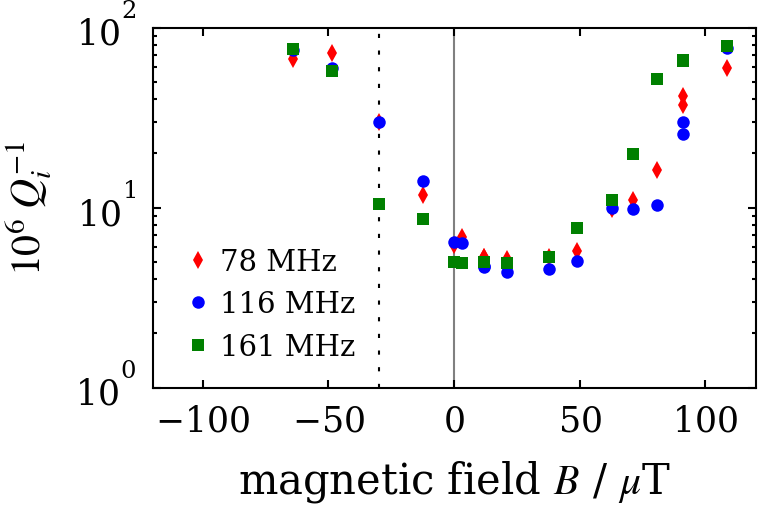

In [19]:
numbers = [0, 1, 2]
colors = ['red', 'blue', 'green']
markers = ['d', 'o', 's']
markersize = 3
alpha = 1

fig, ax = plt.subplots()
ax.set_xlabel('magnetic field $B$ / $\mu$T')
ax.set_ylabel('$10^6 \; Q_i^{-1}$')
ax.set_yscale('log')
B_shield = df[df.shield].field_uT.iloc[0]
B_ambient = df[df.ambient].field_uT.iloc[0]
ax.axvline(B_shield, linestyle='-', color='gray', alpha=1)
ax.axvline(B_ambient, linestyle=':', color='black', alpha=1)

for number in numbers:
    dfn = df[(df.number==number) & (df.sweep_good)] # & (df.noise_good)]
    ax.plot(dfn.field_uT,
            1e6 / dfn.res_Q_i,
            marker=markers[number], color=colors[number],
            markersize=markersize, linestyle='none', alpha=alpha,
            label='{:.0f} MHz'.format(1e-6 * dfn.iloc[0].res_f_0))

ax.set_xlim(-120, 120)
ax.legend(loc='lower left', ncol=1, fontsize=7, numpoints=1);

fig.savefig('iQi_vs_B.pdf', bbox_inches='tight')

# Threshold field $B_\mathrm{th}$

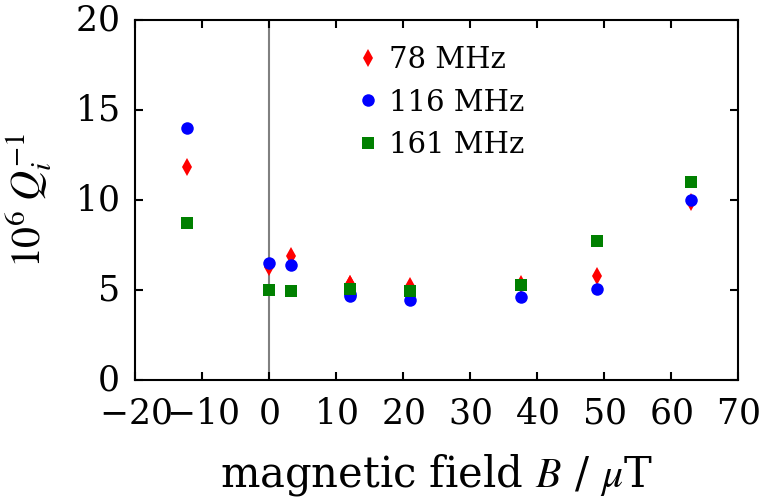

In [20]:
numbers = [0, 1, 2]
colors = ['red', 'blue', 'green']
markers = ['d', 'o', 's']
markersize = 3
alpha = 1

fig, ax = plt.subplots()
ax.set_xlabel('magnetic field $B$ / $\mu$T')
ax.set_ylabel('$10^6 \; Q_i^{-1}$')

B_shield = df[df.shield].field_uT.iloc[0]
B_ambient = df[df.ambient].field_uT.iloc[0]
ax.axvline(B_shield, linestyle='-', color='gray', alpha=1)
ax.axvline(B_ambient, linestyle=':', color='black', alpha=1)

for number in numbers:
    dfn = df[(df.number==number) & (df.sweep_good)] # & (df.noise_good)]
    ax.plot(dfn.field_uT,
            1e6 / dfn.res_Q_i,
            marker=markers[number], color=colors[number],
            markersize=markersize, linestyle='none', alpha=alpha,
            label='{:.0f} MHz'.format(1e-6 * dfn.iloc[0].res_f_0))

ax.set_xlim(-20, 70)
ax.set_ylim(0, 20)
ax.legend(loc='upper center', ncol=1, fontsize=7, numpoints=1)

fig.savefig('iQi_vs_B_threshold.pdf', bbox_inches='tight')

# $S_{xx}$ with $B$ colorbar

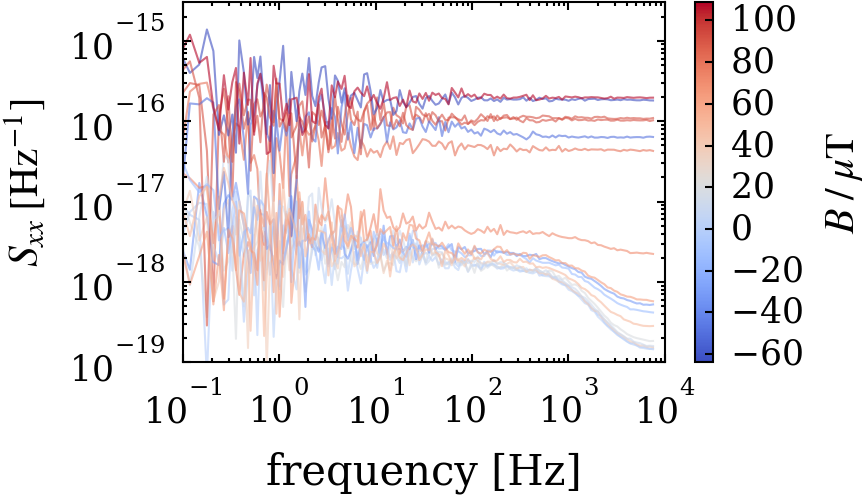

In [21]:
number = 2

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel(r'$S_{xx} \; [\mathrm{Hz}^{-1}]$')

for n, row in df[(df.number==number) & (df.sweep_good) & (df.noise_good)].iterrows():
    ax.plot(row.S_frequency_masked_binned,
            row.S_xx_masked_binned,
            color=B_mappable.to_rgba(row.field_uT),
            alpha=0.6)

fig.colorbar(B_mappable, label='$B \; / \; \mu \mathrm{T}$')

ax.set_xlim(1e-1, 1e4)
ax.set_ylim(1e-19, 3e-15)

fig.savefig('Sxx_vs_f_colorbar_B.pdf', bbox_inches='tight')

# $S_{yy}$ with $Q_i$ colorbar

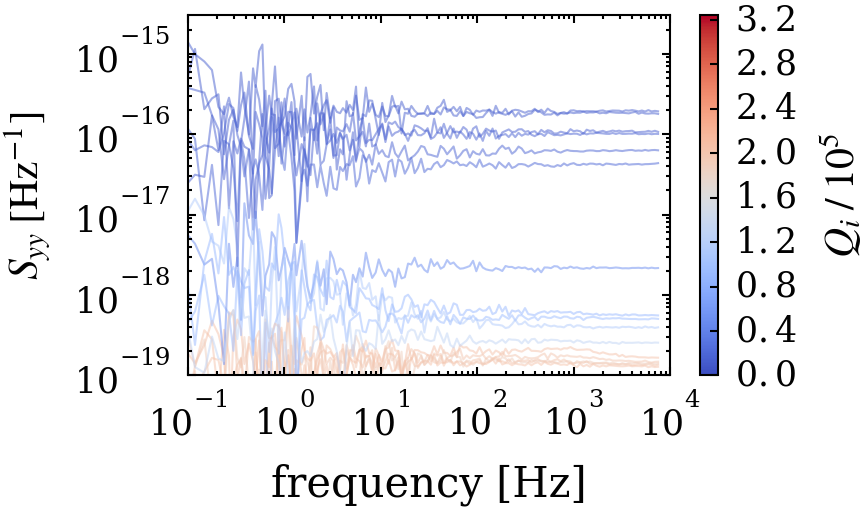

In [22]:
number = 2

fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('frequency [Hz]')
ax.set_ylabel(r'$S_{yy} \; [\mathrm{Hz}^{-1}]$')

for n, row in df[(df.number==number) & (df.sweep_good) & (df.noise_good)].iterrows():
    ax.plot(row.S_frequency_masked_binned,
            row.S_yy_masked_binned,
            color=Qi_mappable.to_rgba(Qi_scale * row.res_Q_i),
            alpha=0.5)

fig.colorbar(Qi_mappable, label='$Q_i \; / \; 10^5$')

ax.set_xlim(1e-1, 1e4)
ax.set_ylim(1e-19, 3e-15);